## <span style="background-color: #282A36; color: #50FA7B;">00 imports</span>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

## <span style="background-color: #282A36; color: #50FA7B;">00 load data</span>

In [2]:
# load data from Yahoo Finance

ticker = 'ITUB'
start_date = '2000-01-01'
data = yf.download(ticker, start=start_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,ITUB,ITUB,ITUB,ITUB,ITUB
Date,,,,,
2002-02-25,0.557789,0.557789,0.536640,0.536905,2164443
2002-02-26,0.575879,0.577863,0.550755,0.554722,25125703
2002-02-27,0.575218,0.577862,0.566755,0.576672,8485222
2002-02-28,0.567945,0.569928,0.567548,0.569928,11933195
2002-03-01,0.555383,0.566623,0.548110,0.566623,3151308


In [4]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,ITUB,ITUB,ITUB,ITUB,ITUB
Date,,,,,
2025-01-07,5.17,5.26,5.1400,5.18,23958000
2025-01-08,5.10,5.10,5.0300,5.07,26767000
2025-01-10,5.04,5.08,5.0100,5.05,32155600
2025-01-13,5.09,5.12,5.0300,5.03,16414800
2025-01-14,5.10,5.12,5.0218,5.04,18542597


## <span style="background-color: #282A36; color: #50FA7B;">01 Simpler Returns</span>


## <span style="background-color: #282A36; color: #50FA7B;">$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$</span>

In [5]:
data['simple_return'] = (data['Close'] / data['Close'].shift(1)) - 1
print (data['simple_return'])

Date
2002-02-25         NaN
2002-02-26    0.032431
2002-02-27   -0.001148
2002-02-28   -0.012644
2002-03-01   -0.022118
                ...   
2025-01-07    0.019724
2025-01-08   -0.013540
2025-01-10   -0.011765
2025-01-13    0.009921
2025-01-14    0.001965
Name: simple_return, Length: 5761, dtype: float64


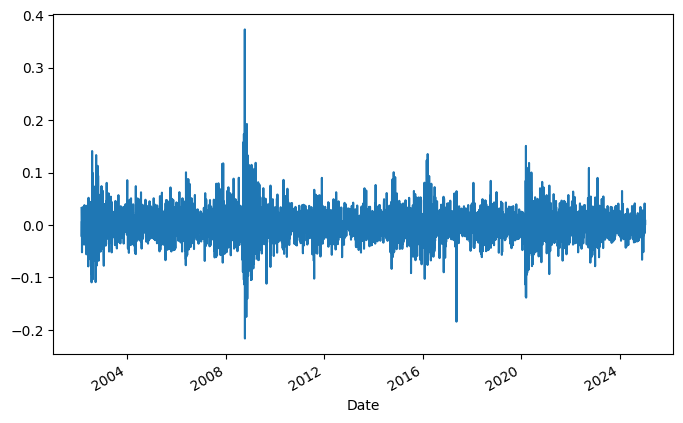

In [6]:
data['simple_return'].plot(figsize=(8, 5))
plt.show()

In [7]:
# estimate the daily and the annual mean of the obtained log returns
avg_return_d = data['simple_return'].mean()
avg_return_d

np.float64(0.0007849205027994305)

In [8]:
avg_return_a = data['simple_return'].mean() * 250
avg_return_a

np.float64(0.19623012569985762)

In [9]:
print (str(round(avg_return_a, 5) * 100) + ' %')

19.622999999999998 %


## <span style="background-color: #282A36; color: #50FA7B;">02 Logarithmic Returns</span>

## <span style="background-color: #282A36; color: #50FA7B;">$$
ln(\frac{P_t}{P_{t-1}})
$$</span>

In [10]:
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))
print (data['log_return'])

Date
2002-02-25         NaN
2002-02-26    0.031916
2002-02-27   -0.001149
2002-02-28   -0.012724
2002-03-01   -0.022367
                ...   
2025-01-07    0.019532
2025-01-08   -0.013632
2025-01-10   -0.011834
2025-01-13    0.009872
2025-01-14    0.001963
Name: log_return, Length: 5761, dtype: float64


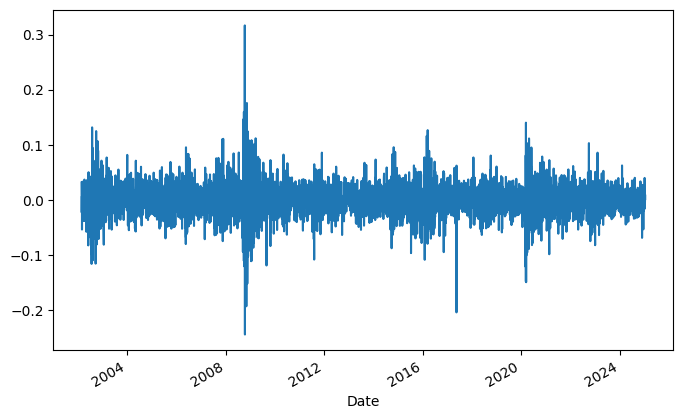

In [11]:
data['log_return'].plot(figsize=(8, 5))
plt.show()

In [12]:
log_return_d = data['log_return'].mean()
log_return_d

np.float64(0.00038420395520526667)

In [13]:
log_return_a = data['log_return'].mean() * 250
log_return_a

np.float64(0.09605098880131667)

In [14]:
print (str(round(log_return_a, 5) * 100) + ' %')

9.605 %


## <span style="background-color: #282A36; color: #50FA7B;">03 Return of a Portfolio of Securities</span>

In [47]:
tickers = ['PG', 'MSFT', 'F', 'GE']
data = pd.DataFrame()
for t in tickers:
    data[t] = yf.download(t, start='1995-1-1')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7560 entries, 1995-01-03 to 2025-01-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7560 non-null   float64
 1   MSFT    7560 non-null   float64
 2   F       7560 non-null   float64
 3   GE      7560 non-null   float64
dtypes: float64(4)
memory usage: 295.3 KB


In [49]:
data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.441168,2.314820,3.569731,20.200666
1995-01-04,7.381517,2.331646,3.665779,20.200666
1995-01-05,7.277129,2.293186,3.633763,20.250170
1995-01-06,7.292047,2.331646,3.633763,20.151148
1995-01-09,7.262219,2.317223,3.697793,19.953104


In [50]:
data.tail()

,PG,MSFT,F,GE
Date,,,,
2025-01-07,161.300003,422.369995,9.76,172.309998
2025-01-08,162.100006,424.559998,9.74,172.889999
2025-01-10,158.559998,418.950012,9.65,171.690002
2025-01-13,158.839996,417.190002,9.71,171.570007
2025-01-14,159.740005,415.670013,9.78,176.860001


<!-- ### <span style="background-color: #282A36; color: #50FA7B;">Normalization to 100</span> -->
### Normalization to 100:

## <span style="background-color: #282A36; color: #50FA7B;">$$
\frac {P_t}{P_0} * 100
$$</span>

In [51]:
data.iloc[0]

PG       7.441168
MSFT     2.314820
F        3.569731
GE      20.200666
Name: 1995-01-03 00:00:00, dtype: float64

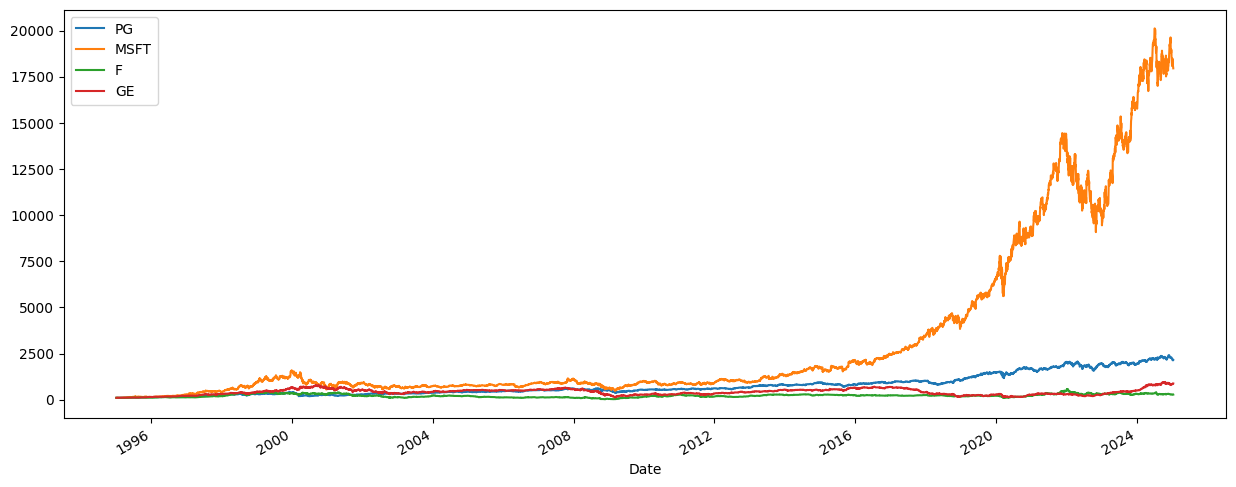

In [52]:
(data / data.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

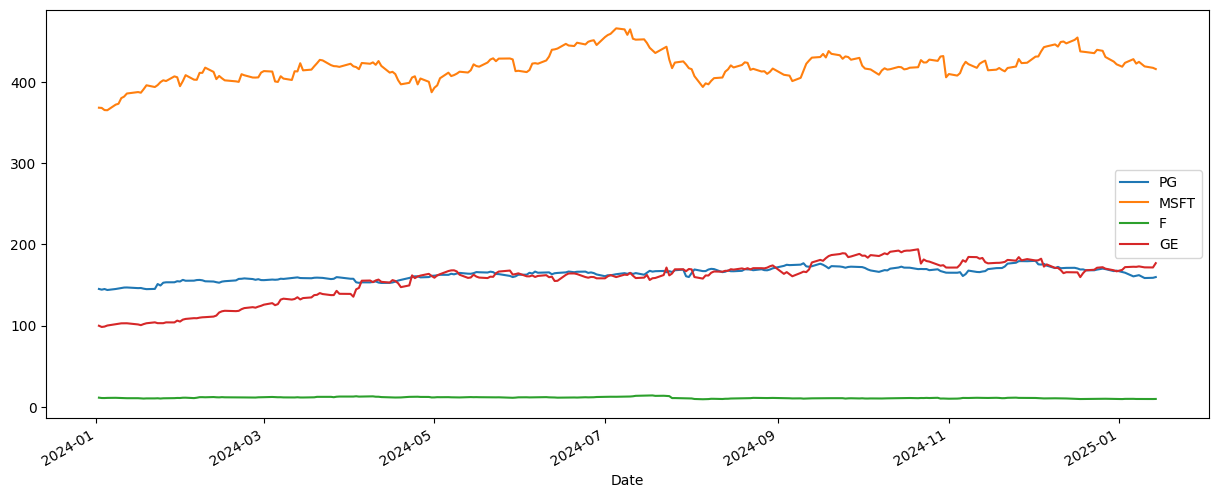

In [36]:
data.plot(figsize=(15,6))
plt.show()

In [54]:
data.loc['1995-01-03']

PG       7.441168
MSFT     2.314820
F        3.569731
GE      20.200666
Name: 1995-01-03 00:00:00, dtype: float64

In [55]:
data.iloc[0]

PG       7.441168
MSFT     2.314820
F        3.569731
GE      20.200666
Name: 1995-01-03 00:00:00, dtype: float64

## <span style="background-color: #282A36; color: #50FA7B;">Calculating the Return of Portfolio</span>

In [56]:
returns = (data / data.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002050,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [57]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [58]:
np.dot(returns, weights)

array([        nan,  0.00653969, -0.00922995, ..., -0.01280829,
        0.00077091,  0.01001616], shape=(7560,))

***

In [59]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.125509
MSFT    0.219471
F       0.113347
GE      0.122456
dtype: float64

In [60]:
np.dot(annual_returns, weights)

np.float64(0.1451956940568718)

In [64]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

14.52 %


In [65]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [67]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

14.52 %
16.112000000000002 %


## <span style="background-color: #282A36; color: #50FA7B;">04 Calculating the Return of Index</span>

In [82]:
# ^GSPC = S&P500, ^IXIC = NASDAQ, ^GDAXI = DAX (indice alemao), ^FTSE = NASDAQ (footsie)
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE']
data = pd.DataFrame()
for t in tickers:
    data[t] = yf.download(t, start='1997-1-1')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7054 entries, 1997-01-02 to 2025-01-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   7054 non-null   float64
 1   ^IXIC   7054 non-null   float64
 2   ^GDAXI  6929 non-null   float64
 3   ^FTSE   6922 non-null   float64
dtypes: float64(4)
memory usage: 275.5 KB


In [84]:
data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000


In [85]:
data.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2025-01-07,5909.029785,19489.679688,20340.570312,8245.299805
2025-01-08,5918.250000,19478.880859,20329.939453,8251.000000
2025-01-10,5827.040039,19161.630859,20214.789062,8248.500000
2025-01-13,5836.220215,19088.099609,20132.849609,8224.200195
2025-01-14,5842.910156,19044.392578,20271.330078,8201.540039


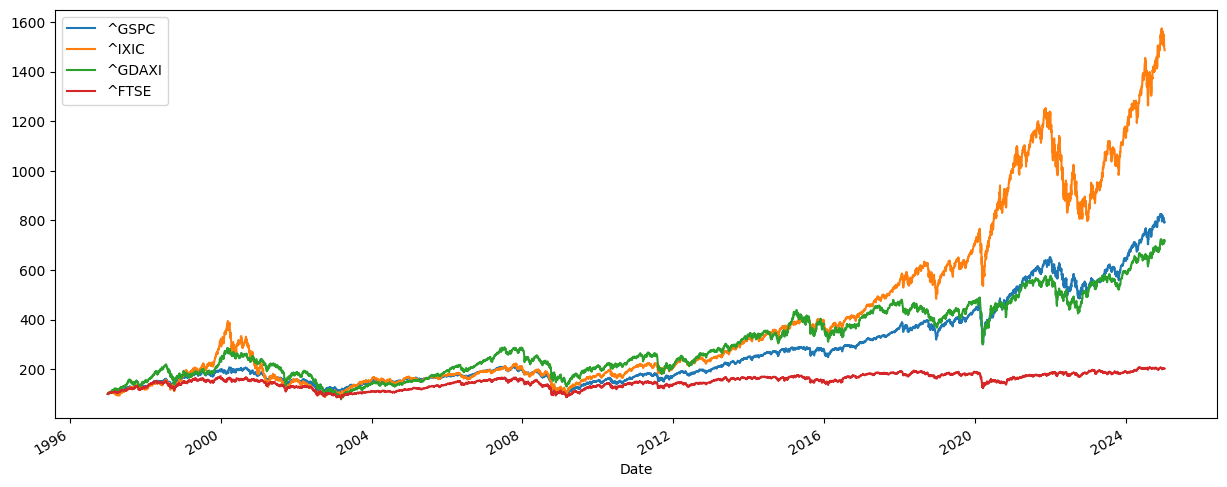

In [86]:
(data / data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

***

In [87]:
returns = (data / data.shift(1)) - 1

returns.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2025-01-07,-0.011104,-0.018893,0.006153,-0.000533
2025-01-08,0.001560,-0.000554,-0.000523,0.000691
2025-01-10,-0.015412,-0.016287,-0.005664,-0.000303
2025-01-13,0.001575,-0.003837,-0.004053,-0.002946
2025-01-14,0.001146,-0.002290,0.006878,-0.002755


In [88]:
ind_returns = returns.mean() * 250
annual_returns

PG      0.125509
MSFT    0.219471
F       0.113347
GE      0.122456
dtype: float64

***

In [93]:
tickers = ['PG', '^GSPC', '^DJI']
data_2 = pd.DataFrame()
for t in tickers:
    data_2[t] = yf.download(t, start='2007-1-1')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [94]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2025-01-07,161.300003,5909.029785,42528.359375
2025-01-08,162.100006,5918.250000,42635.199219
2025-01-10,158.559998,5827.040039,41938.449219
2025-01-13,158.839996,5836.220215,42297.121094
2025-01-14,159.740005,5842.910156,42518.281250


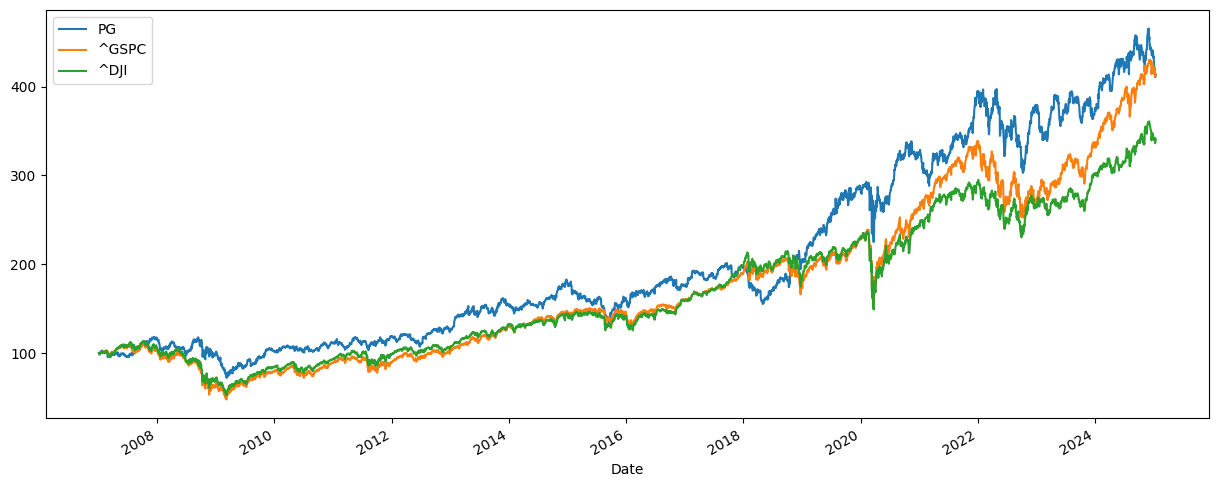

In [95]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()